<a href="https://colab.research.google.com/github/MuhAdeRizki/202155202027-MuhammadAdeRizki/blob/master/DL_TM4(202155202027).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras import datasets,models,layers

In [23]:
data = tf.keras.datasets.cifar10
# The CIFAR10 dataset contains 60,000 color images in 10 classes,
# with 6,000 images in each class. The dataset is divided into 50,000 training
# images and 10,000 testing images.

In [24]:
(train_images, train_labels), (test_images, test_labels) = data.load_data()

In [25]:
train_images.shape

(50000, 32, 32, 3)

In [26]:
test_images.shape

(10000, 32, 32, 3)

In [27]:
print(train_labels[0])

[6]


In [28]:
print(train_images[1])

[[[154 177 187]
  [126 137 136]
  [105 104  95]
  ...
  [ 91  95  71]
  [ 87  90  71]
  [ 79  81  70]]

 [[140 160 169]
  [145 153 154]
  [125 125 118]
  ...
  [ 96  99  78]
  [ 77  80  62]
  [ 71  73  61]]

 [[140 155 164]
  [139 146 149]
  [115 115 112]
  ...
  [ 79  82  64]
  [ 68  70  55]
  [ 67  69  55]]

 ...

 [[175 167 166]
  [156 154 160]
  [154 160 170]
  ...
  [ 42  34  36]
  [ 61  53  57]
  [ 93  83  91]]

 [[165 154 128]
  [156 152 130]
  [159 161 142]
  ...
  [103  93  96]
  [123 114 120]
  [131 121 131]]

 [[163 148 120]
  [158 148 122]
  [163 156 133]
  ...
  [143 133 139]
  [143 134 142]
  [143 133 144]]]


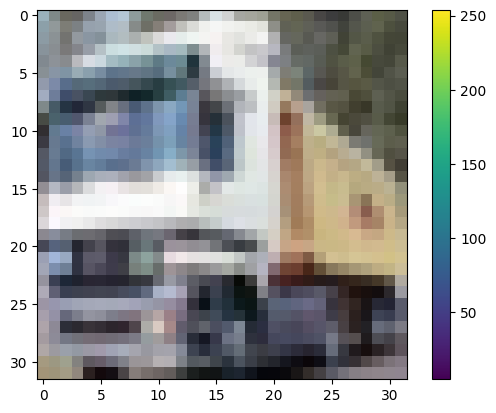

In [29]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)

plt.show()

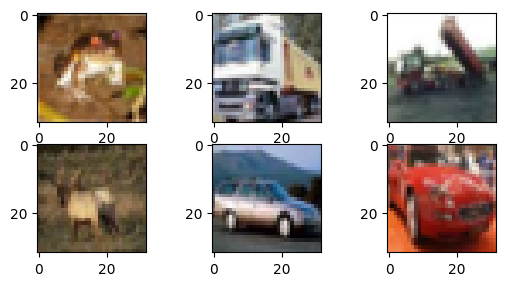

In [30]:
for i in range(6):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(train_images[i])
plt.show()

In [31]:
#Normalize

train_images, test_images = train_images / 255.0, test_images / 255.0

In [32]:
model = tf.keras.models.Sequential([
                        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                        tf.keras.layers.Flatten(),
                        tf.keras.layers.Dense(128, activation='relu'),
                        tf.keras.layers.Dense(10, activation='softmax')])

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

In [34]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=20,
                    validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 [==============================] - 79s 50ms/step - loss: 1.5056 - accuracy: 0.4532 - val_loss: 1.3116 - val_accuracy: 0.5298
Epoch 2/20
1563/1563 [==============================] - 69s 44ms/step - loss: 1.1237 - accuracy: 0.5991 - val_loss: 1.0101 - val_accuracy: 0.6408
Epoch 3/20
1563/1563 [==============================] - 71s 46ms/step - loss: 0.9579 - accuracy: 0.6639 - val_loss: 0.9434 - val_accuracy: 0.6657
Epoch 4/20
1563/1563 [==============================] - 71s 45ms/step - loss: 0.8489 - accuracy: 0.7015 - val_loss: 0.9205 - val_accuracy: 0.6789
Epoch 5/20
1563/1563 [==============================] - 69s 44ms/step - loss: 0.7702 - accuracy: 0.7287 - val_loss: 0.8760 - val_accuracy: 0.6927
Epoch 6/20
1563/1563 [==============================] - 73s 47ms/step - loss: 0.7052 - accuracy: 0.7539 - val_loss: 0.8689 - val_accuracy: 0.7024
Epoch 7/20
1563/1563 [==============================] - 68s 44ms/step - loss: 0.6444 - accuracy: 0.7719 - val_loss: 0.8707 -

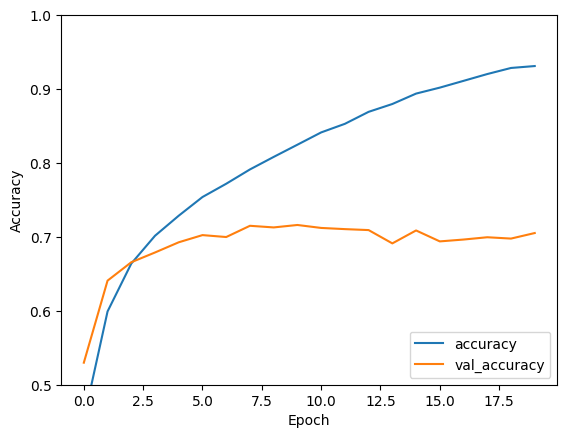

In [35]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')